In [0]:
#hide
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
plt.style.use('seaborn')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
#hide
pip install countryinfo

In [0]:
#hide
from countryinfo import CountryInfo
#country = CountryInfo('United States')
#CountryInfo('United States').population()
CountryInfo('Portugal').population()

10477800

In [0]:
#hide
def display_all(df,Nrows=5,Ncolumns=1000):
    # função para não cortar colunas ao visualizar    
    import pandas as pd
    from IPython.display import display
    with pd.option_context("display.max_rows", Nrows): 
        with pd.option_context("display.max_columns", Ncolumns): 
            display(df)

In [0]:
#hide
Npeople = {'Country/Region': ['Portugal', 'Spain', 'Italy', 'China', 'United Kingdom', 'US', 'Iran', 'France'], 
           'Population':     [      10.3,    46.4,    59.4,    1410,             66.2,  324,  81.2 ,   67.064]}
Npeople = pd.DataFrame(data=Npeople)
Npeople = Npeople.set_index('Country/Region')

In [0]:
#hide
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#confirmed_df['3/18/20'][59] = 642
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [0]:
#hide_input
cols = confirmed_df.keys()

cols[-1]

'3/28/20'

In [0]:
#hide

df_group = deaths_df.groupby(['Country/Region']).sum()

display_all(df_group,20)
#df_group.loc['Portugal']

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Vietnam,16.0000,108.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [0]:
#hide
cols = confirmed_df.keys()

confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

KeyError: ignored

In [0]:
#hide
plt.plot(dates,world_cases)

NameError: ignored

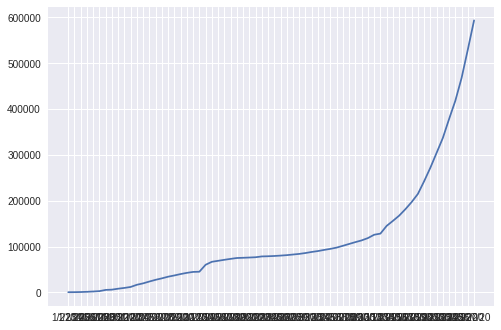

In [0]:
#hide
plt.plot(dates,world_cases)

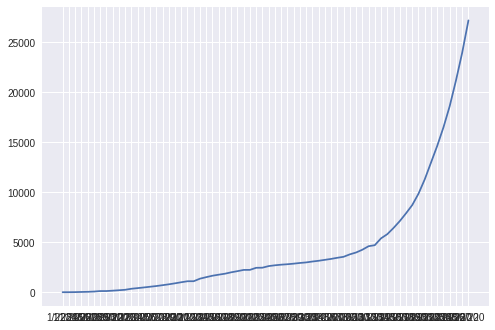

In [0]:
#hide
plt.plot(dates,total_deaths)

In [0]:
#hide
def day_zero(df,country,N0):

  cols = df.keys()
  cols = df.loc[country, cols[3]:cols[-1]].keys()

  flag = 0
  day_0 = 0
  for xi in range(len(cols)):
    if df[cols[xi]][country] > flag: 
      flag = df[cols[xi]][country]
    if flag >= N0: 
      day_0 = xi+1
      break
    else:
      continue
  return day_0

In [0]:
#hide
def plot_slope(SLOPE=2, LINE_WIDTH=1, MARKERZISE=24, LINESTYLE='dashed', COLOR='grey', N0=100):
  NDAY = 100
  X = [0 , NDAY]
  Y = [N0 , N0*SLOPE**(NDAY)]
  #print(f'N0 = {N0}')
  #print(f'N0*SLOPE^(NDAY) = {N0*SLOPE**(NDAY)}')
  ax.plot(X, Y, linewidth=LINE_WIDTH, markersize=MARKERZISE, linestyle = LINESTYLE, color=COLOR)
  ax.set_yscale('log')


In [0]:
#hide
def plot_country(country, day=1, case=1, LINE_WIDTH=3, MARKERZISE=24, LINESTYLE='solid', color='black', DAY0=True, DAY_LABEL=2, maxy = 60000):
  '''
  case 1: confirmed
  case 2: death
  case 3: recoveries
  '''
  if ((case !=1) and (case !=2) and (case !=3)): 
    print('Error: Case number')
    return

  import matplotlib.dates as mdates
  from dateutil import rrule, parser
  from matplotlib.ticker import FormatStrFormatter
  size_title = 24
  subtitle = 'Date: 28/03/2020'
  COLOR = color

  # Data
  if case == 1: 
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#    df['3/18/20'][59] = 642
    DAY_ZERO = 100
    title = 'Number of confirmed cases of COVID-19 per 100 000 population'
    miny = 100
  if case == 2: 
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

    DAY_ZERO = 10
    title = 'Number of deaths caused by COVID-19 per 100 000 population'
    miny = 10
  if case == 3: 
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
    title = 'Number of people that recovered from COVID-19'
    DAY0 = False
    miny = 1

  df_group = df.groupby(['Country/Region']).sum()
  if DAY0: day0 = day_zero(df_group,country,DAY_ZERO)

  if country != 'US':
    NPeopleAPI = CountryInfo(country)
    NPeople = NPeopleAPI.population()
  else:
    NPeopleAPI = CountryInfo('United States')
    NPeople = NPeopleAPI.population()

# print(country)
# print(NPeople)    

  cols = df.keys()
  df_dates = df.loc[:, cols[4]:cols[-1]]

  # Dates
  df_dates = df_dates.keys()
  datemin = df_dates[0]
  datemax = df_dates[day]
  mydates = list(rrule.rrule(rrule.DAILY,
                             dtstart=parser.parse(datemin),
                             until=parser.parse(datemax)))
  
  if day > df_group.loc[country][day0+2:].size: day = df_group.loc[country][day0+2:].size
  mydates_day0 = np.arange(day)

  # Plot
  

  y = []
  for i in range(len(mydates_day0)):
#    print(f'df_group.loc[country][day0+2+i] = {df_group.loc[country][day0+2+i]}')
#    print(f'NPeople = {NPeople}')
    x = df_group.loc[country][day0+2+i]/float(NPeople)
    x = x*100000
#    print(f'df_group.loc[country][day0+2+i] = {x}')
    y.append(x)

  ax.plot(mydates_day0, y, linewidth=LINE_WIDTH, markersize=MARKERZISE, linestyle = LINESTYLE, color=COLOR, label= f'{country}')
  # ----------------------------------------------------------------------------
  # Texto
  ax.text(0, 1.15, title,
          transform=ax.transAxes, size=size_title, weight=600, ha='left', va='top')    
  ax.text(0, 1.06, subtitle, transform=ax.transAxes, size=size_title-5, color='#777777')
  ax.text(0.7, 0.05, 'Vasco Mano; Source: John Hopkins', transform=ax.transAxes,
          color='#777777', size=size_title-8, ha='left', va='bottom' ,bbox=dict(facecolor='white', alpha=1.0, edgecolor='white'))
#  if case == 1 or case == 2: ax.text(-0.095, 0.5, 'Log scale', transform=ax.transAxes, color='#777777', size=size_title-6, ha='left', va='bottom' , rotation = 'vertical', bbox=dict(facecolor='white', alpha=1.0, edgecolor='white'))

  # formating
  ax.xaxis.set_ticks_position('top')
  ax.tick_params(axis='x', colors='#777777', labelsize=size_title-8)
  #plt.xlabel('Number of days since day 0')

  #ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
  ax.tick_params(axis="y", labelsize=size_title-8)
#  if case == 1 or case == 2: ax.set_yscale('log')
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
  #plt.ylabel('Log scale', fontsize=size_title-8)

  ax.grid(which='both', axis='x', linestyle='-')
  ax.grid(color='#777777', linestyle=(0, (5, 5)), linewidth=0.3)
  ax.grid(True)

  ax.margins(0, 0.01)

  plt.legend(loc=2, prop={'size': size_title-8}, frameon=False)

  plt.box(False)
  #fig.patch.set_facecolor('white')
  # ----------------------------------------------------------------------------
  return

## Gráficos

'\nax.text(0.180, 0.92, "Cases double\nevery day", transform=ax.transAxes, size=24-5, color=\'#777777\')\nplot_slope(SLOPE=2)       # duplica diariamente\n\nax.text(0.39, 0.90, "every 2 days", transform=ax.transAxes, size=24-5, color=\'#777777\')\nplot_slope(SLOPE=(1.5))   # duplica 2 dias\n\nax.text(0.585, 0.885, "every 3 days", transform=ax.transAxes, size=24-5, color=\'#777777\')\nplot_slope(SLOPE=(1.334)) # duplica 3 dias\n\nax.text(0.86, 0.77, "every 5 days", transform=ax.transAxes, size=24-5, color=\'#777777\')\nplot_slope(SLOPE= 1.2)    # duplica 5 dias\n'

(0.0, 30.0)

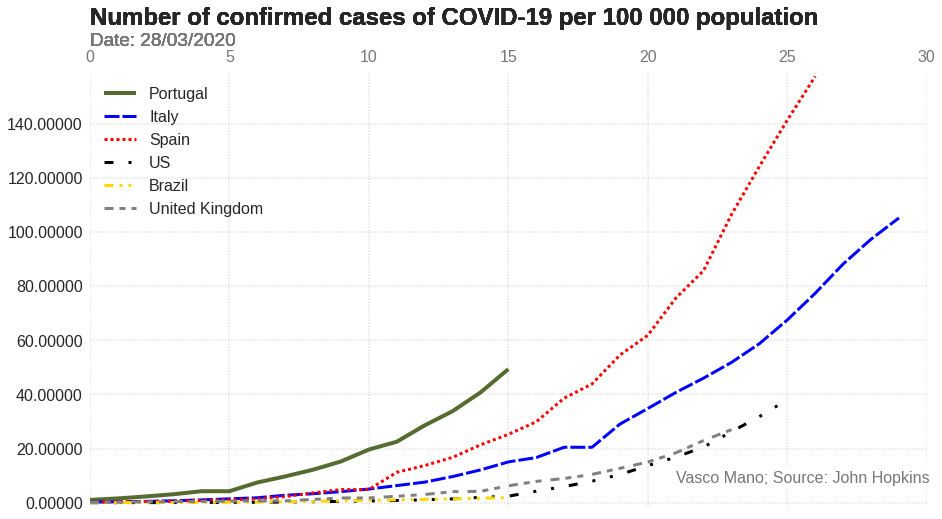

In [0]:
#hide_input
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15, 8))

#plot_slope()
plot_country('Portugal', day=30, case=1, LINE_WIDTH=4, MARKERZISE=24, color='darkolivegreen', LINESTYLE=(0, ())                , DAY0=True)
plot_country(   'Italy', day=30, case=1, LINE_WIDTH=3, MARKERZISE=24, color='blue'          , LINESTYLE=(0, (5, 1))            , DAY0=True)
plot_country(   'Spain', day=30, case=1, LINE_WIDTH=3, MARKERZISE=24, color='red'           , LINESTYLE=(0, (1, 1))            , DAY0=True)
#plot_country(    'Iran', day=30, case=1, LINE_WIDTH=3, MARKERZISE=24, color='springgreen'   , LINESTYLE=(0, (3, 1, 1, 1, 1, 1)), DAY0=True)
#plot_country( 'Iceland', day=30, case=1, LINE_WIDTH=3, MARKERZISE=24, color='cyan'          , LINESTYLE=(0, (3, 1, 3, 1, 3, 1)), DAY0=True)
plot_country(      'US', day=30, case=1, LINE_WIDTH=3, MARKERZISE=24, color='black'         , LINESTYLE=(0, (3, 5, 1, 5, 1, 5)), DAY0=True)
plot_country(  'Brazil', day=30, case=1, LINE_WIDTH=3, MARKERZISE=24, color='gold'          , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
#plot_country(  'Canada', day=30, case=1, LINE_WIDTH=3, MARKERZISE=24, color='maroon'        , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
#plot_country('China', case=1, LINE_WIDTH=3, MARKERZISE=24, LINESTYLE=solid, DAY0=True)
#plot_country('France', case=1, LINE_WIDTH=3, MARKERZISE=24, LINESTYLE=solid, DAY0=True)
plot_country( 'United Kingdom', day=30, case=1, LINE_WIDTH=3, MARKERZISE=24, color='gray'   , LINESTYLE=(0, (3, 2, 2, 2, 2, 3)), DAY0=True)

'''
ax.text(0.180, 0.92, "Cases double\nevery day", transform=ax.transAxes, size=24-5, color='#777777')
plot_slope(SLOPE=2)       # duplica diariamente

ax.text(0.39, 0.90, "every 2 days", transform=ax.transAxes, size=24-5, color='#777777')
plot_slope(SLOPE=(1.5))   # duplica 2 dias

ax.text(0.585, 0.885, "every 3 days", transform=ax.transAxes, size=24-5, color='#777777')
plot_slope(SLOPE=(1.334)) # duplica 3 dias

ax.text(0.86, 0.77, "every 5 days", transform=ax.transAxes, size=24-5, color='#777777')
plot_slope(SLOPE= 1.2)    # duplica 5 dias
'''

ax.set_xlim(0, 30)
#ax.set_ylim(100, 120000)

from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.5f'))

#plt.yticks(np.array([   100, 500, 1000, 2500, 5000, 
#                      10000,                      15000,        
#                      20000,                         
#                      30000, 45000, 60000, 75000]))

#plt.yticks(np.array([0 , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]))


#plt.show()


'\nax.text(0.165, 0.93, "Deaths double\nevery day", transform=ax.transAxes, size=24-5, color=\'#777777\')\nplot_slope(SLOPE=2, N0=10)       # duplica diariamente\nax.text(0.36, 0.90, "every 2 days", transform=ax.transAxes, size=24-5, color=\'#777777\')\nplot_slope(SLOPE=(1.5), N0=10)   # duplica 2 dias\nax.text(0.55, 0.887, "every 3 days", transform=ax.transAxes, size=24-5, color=\'#777777\')\nplot_slope(SLOPE=(1.334), N0=10) # duplica 3 dias\nax.text(0.87, 0.68, "every 5 days", transform=ax.transAxes, size=24-5, color=\'#777777\')\nplot_slope(SLOPE= 1.2, N0=10)    # duplica 5 dias\n'

(0.0, 30.0)

(0.0, 10.0)

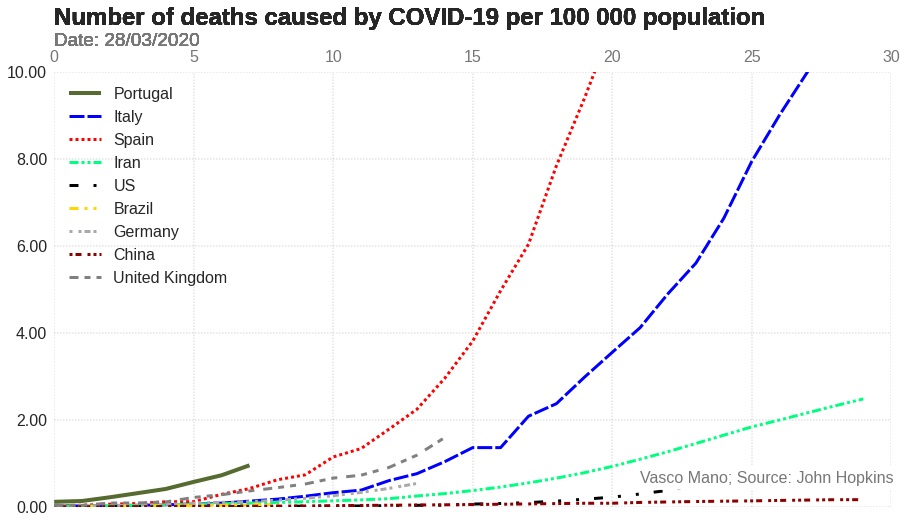

In [0]:
#hide_input
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15, 8))

plot_country('Portugal', day=30, case=2, LINE_WIDTH=4, MARKERZISE=24, color='darkolivegreen', LINESTYLE=(0, ())                , DAY0=True)
plot_country(   'Italy', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='blue'          , LINESTYLE=(0, (5, 1))            , DAY0=True)
plot_country(   'Spain', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='red'           , LINESTYLE=(0, (1, 1))            , DAY0=True)
plot_country(    'Iran', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='springgreen'   , LINESTYLE=(0, (3, 1, 1, 1, 1, 1)), DAY0=True)
#plot_country( 'Iceland', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='cyan'          , LINESTYLE=(0, (3, 1, 3, 1, 3, 1)), DAY0=True)
plot_country(      'US', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='black'         , LINESTYLE=(0, (3, 5, 1, 5, 1, 5)), DAY0=True)
plot_country(  'Brazil', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='gold'          , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
#plot_country(  'Canada', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='maroon'        , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
plot_country( 'Germany', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='darkgray'          , LINESTYLE=(0, (1, 2, 1, 1, 2, 1)), DAY0=True)
#plot_country( 'France', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='gray'          , LINESTYLE=(0, (3, 2, 2, 2, 2, 3)), DAY0=True)
plot_country(   'China', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='darkred'       , LINESTYLE=(0, (1, 1, 2, 2, 1, 1)), DAY0=True)
plot_country( 'United Kingdom', day=30, case=2, LINE_WIDTH=3, MARKERZISE=24, color='gray'   , LINESTYLE=(0, (3, 2, 2, 2, 2, 3)), DAY0=True)

'''
ax.text(0.165, 0.93, "Deaths double\nevery day", transform=ax.transAxes, size=24-5, color='#777777')
plot_slope(SLOPE=2, N0=10)       # duplica diariamente
ax.text(0.36, 0.90, "every 2 days", transform=ax.transAxes, size=24-5, color='#777777')
plot_slope(SLOPE=(1.5), N0=10)   # duplica 2 dias
ax.text(0.55, 0.887, "every 3 days", transform=ax.transAxes, size=24-5, color='#777777')
plot_slope(SLOPE=(1.334), N0=10) # duplica 3 dias
ax.text(0.87, 0.68, "every 5 days", transform=ax.transAxes, size=24-5, color='#777777')
plot_slope(SLOPE= 1.2, N0=10)    # duplica 5 dias
'''

#ax.set_xlim(0, 30)
#ax.set_ylim(10, 8000)

ax.set_xlim( 0, 30)
ax.set_ylim( 0,  10)

from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#plt.legend(loc=2, prop={'size': 24-8}, frameon=False)
plt.show()


## Vídeo

In [0]:
#hide
def frames(NDAYS):
  import matplotlib.ticker as ticker

  ax.clear()
  plot_country('Portugal', day=NDAYS, case=1, LINE_WIDTH=4, MARKERZISE=24, color='darkolivegreen', LINESTYLE=(0, ())                , DAY0=True)
  plot_country(   'Italy', day=NDAYS, case=1, LINE_WIDTH=3, MARKERZISE=24, color='blue'          , LINESTYLE=(0, (5, 1))            , DAY0=True)
  plot_country(   'Spain', day=NDAYS, case=1, LINE_WIDTH=3, MARKERZISE=24, color='red'           , LINESTYLE=(0, (1, 1))            , DAY0=True)
  plot_country(    'Iran', day=NDAYS, case=1, LINE_WIDTH=3, MARKERZISE=24, color='springgreen'   , LINESTYLE=(0, (3, 1, 1, 1, 1, 1)), DAY0=True)
  plot_country( 'Iceland', day=NDAYS, case=1, LINE_WIDTH=3, MARKERZISE=24, color='cyan'          , LINESTYLE=(0, (3, 1, 3, 1, 3, 1)), DAY0=True)
  plot_country(      'US', day=NDAYS, case=1, LINE_WIDTH=3, MARKERZISE=24, color='black'         , LINESTYLE=(0, (3, 5, 1, 5, 1, 5)), DAY0=True)
  plot_country(  'Brazil', day=NDAYS, case=1, LINE_WIDTH=3, MARKERZISE=24, color='gold'          , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
  plot_country(  'Canada', day=NDAYS, case=1, LINE_WIDTH=3, MARKERZISE=24, color='maroon'        , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
  #plot_country('China', case=1, LINE_WIDTH=3, MARKERZISE=24, LINESTYLE=solid, DAY0=True, DAY_LABEL=2)
  #plot_country('France', case=1, LINE_WIDTH=3, MARKERZISE=24, LINESTYLE=solid, DAY0=True, DAY_LABEL=2)
  #plot_country('Germany', case=1, LINE_WIDTH=3, MARKERZISE=24, LINESTYLE=solid, DAY0=True, DAY_LABEL=2)


  ax.text(0.165, 0.92, "Cases double\nevery day", transform=ax.transAxes, size=24-5, color='#777777')
  plot_slope(SLOPE=2)       # duplica diariamente

  ax.text(0.36, 0.90, "every 2 days", transform=ax.transAxes, size=24-5, color='#777777')
  plot_slope(SLOPE=(1.5))   # duplica 2 dias

  ax.text(0.545, 0.885, "every 3 days", transform=ax.transAxes, size=24-5, color='#777777')
  plot_slope(SLOPE=(1.334)) # duplica 3 dias

  #plot_slope(SLOPE=(1.25))  # duplica 4 dias

  ax.text(0.85, 0.81, "every 5 days", transform=ax.transAxes, size=24-5, color='#777777')
  plot_slope(SLOPE= 1.2)    # duplica 5 dias  

  #ax.set_xlim( 0, NDAYS)
  ax.set_xlim( 0, 30)
  ax.set_ylim(100, 75000)
  plt.yticks(np.array([   100, 500, 1000, 2500, 5000, 
                      10000,                      15000,        
                      20000,                         
                      30000, 45000, 60000]))
  



  plt.legend(loc=2, prop={'size': 24-8}, frameon=False)
  #plt.show()



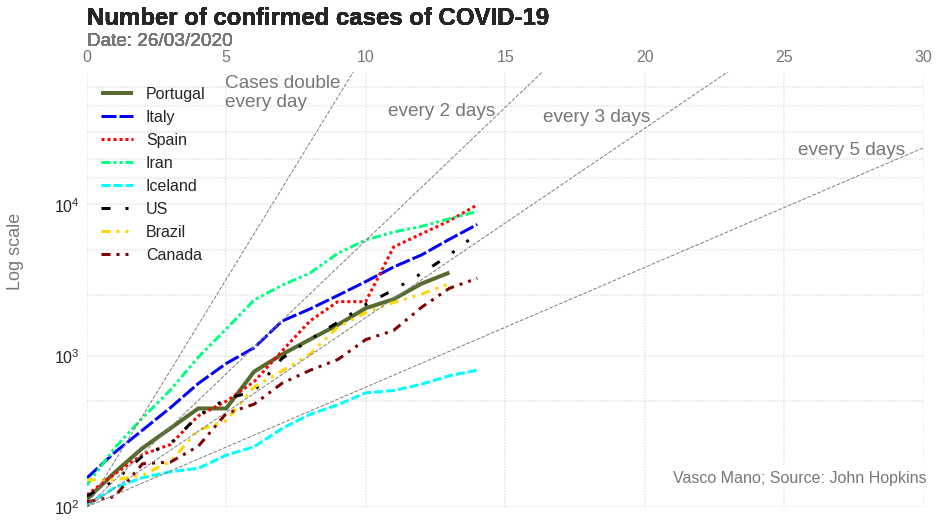

In [0]:
#hide
fig, ax = plt.subplots(figsize=(15, 8))
frames(15)

#plt.legend(loc=2, prop={'size': 24-8}, frameon=False)



In [0]:
#hide
import matplotlib.animation as animation
from IPython.display import HTML

range_frames = [     1,  2,   3,  4,  5,  6,  7,  8,  9,
                10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                30, 30, 30, 30, 30]

fig, ax = plt.subplots(figsize=(18, 10))
animator = animation.FuncAnimation(fig, frames, frames=range_frames, interval=400)
animator.save('drive/My Drive/Colab Notebooks/Covid19/Covid19_26032020.mp4')

In [0]:
#hide
import logging
logging.getLogger().setLevel(logging.CRITICAL)

HTML(animator.to_jshtml())

In [0]:
#hide
import moviepy.editor as mpe
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

my_video = mpe.VideoFileClip('drive/My Drive/Colab Notebooks/Covid19/Covid19_26032020.mp4')
my_audio = mpe.AudioFileClip('drive/My Drive/Colab Notebooks/Covid19/Realization.mp3')

final = my_video.set_audio(my_audio)

end_time = 20
final = final.subclip(0, end_time)

final.write_videofile(f'drive/My Drive/Colab Notebooks/Covid19/Covid19_26032020_video.mp4', audio_codec='libvorbis', rewrite_audio=False)

### Video Deaths

In [0]:
#hide
def frames_deaths(NDAYS):
  import matplotlib.ticker as ticker

  ax.clear()

  plot_country('Portugal', day=NDAYS, case=2, LINE_WIDTH=4, MARKERZISE=24, color='darkolivegreen', LINESTYLE=(0, ())                , DAY0=True)
  plot_country(   'Italy', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='blue'          , LINESTYLE=(0, (5, 1))            , DAY0=True)
  plot_country(   'Spain', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='red'           , LINESTYLE=(0, (1, 1))            , DAY0=True)
  plot_country(    'Iran', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='springgreen'   , LINESTYLE=(0, (3, 1, 1, 1, 1, 1)), DAY0=True)
  #plot_country( 'Iceland', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='cyan'          , LINESTYLE=(0, (3, 1, 3, 1, 3, 1)), DAY0=True)
  plot_country(      'US', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='black'         , LINESTYLE=(0, (3, 5, 1, 5, 1, 5)), DAY0=True)
  plot_country(  'Brazil', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='gold'          , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
  #plot_country(  'Canada', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='maroon'        , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
  #plot_country( 'Germany', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='gray'          , LINESTYLE=(0, (3, 2, 2, 2, 2, 3)), DAY0=True)
  #plot_country( 'France', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='gray'          , LINESTYLE=(0, (3, 2, 2, 2, 2, 3)), DAY0=True)
  plot_country(   'China', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='darkred'       , LINESTYLE=(0, (1, 1, 2, 2, 1, 1)), DAY0=True)
  plot_country( 'United Kingdom', day=NDAYS, case=2, LINE_WIDTH=3, MARKERZISE=24, color='gray'   , LINESTYLE=(0, (3, 2, 2, 2, 2, 3)), DAY0=True)

  ax.text(0.165, 0.93, "Deaths double\nevery day", transform=ax.transAxes, size=24-5, color='#777777')
  plot_slope(SLOPE=2, N0=10)       # duplica diariamente
  ax.text(0.36, 0.90, "every 2 days", transform=ax.transAxes, size=24-5, color='#777777')
  plot_slope(SLOPE=(1.5), N0=10)   # duplica 2 dias
  ax.text(0.55, 0.887, "every 3 days", transform=ax.transAxes, size=24-5, color='#777777')
  plot_slope(SLOPE=(1.334), N0=10) # duplica 3 dias
  ax.text(0.87, 0.68, "every 5 days", transform=ax.transAxes, size=24-5, color='#777777')
  plot_slope(SLOPE= 1.2, N0=10)    # duplica 5 dias

  ax.set_xlim( 0,   30)
  ax.set_ylim(10, 8000)

  plt.yticks(np.array([ 10,  50, 100]))

  plt.legend(loc=2, prop={'size': 24-8}, frameon=False)
  #plt.show()

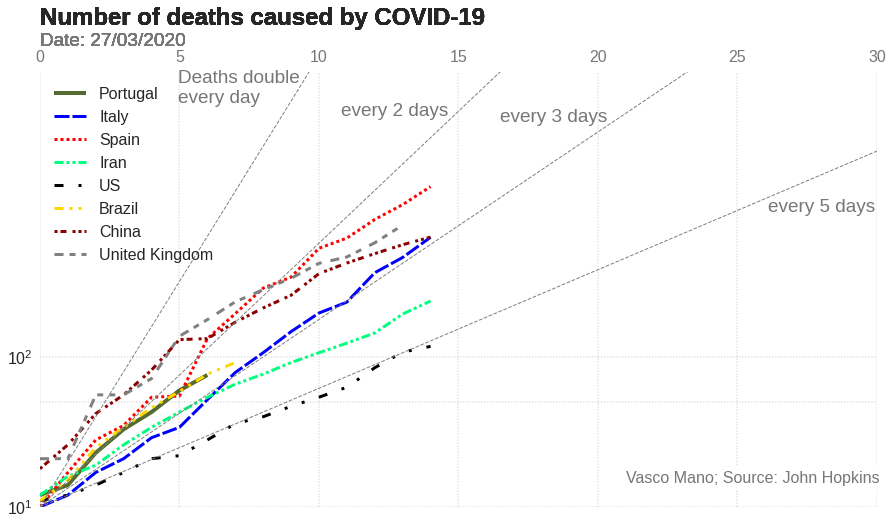

In [0]:
#hide
fig, ax = plt.subplots(figsize=(15, 8))
frames_deaths(15)

In [0]:
#hide
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


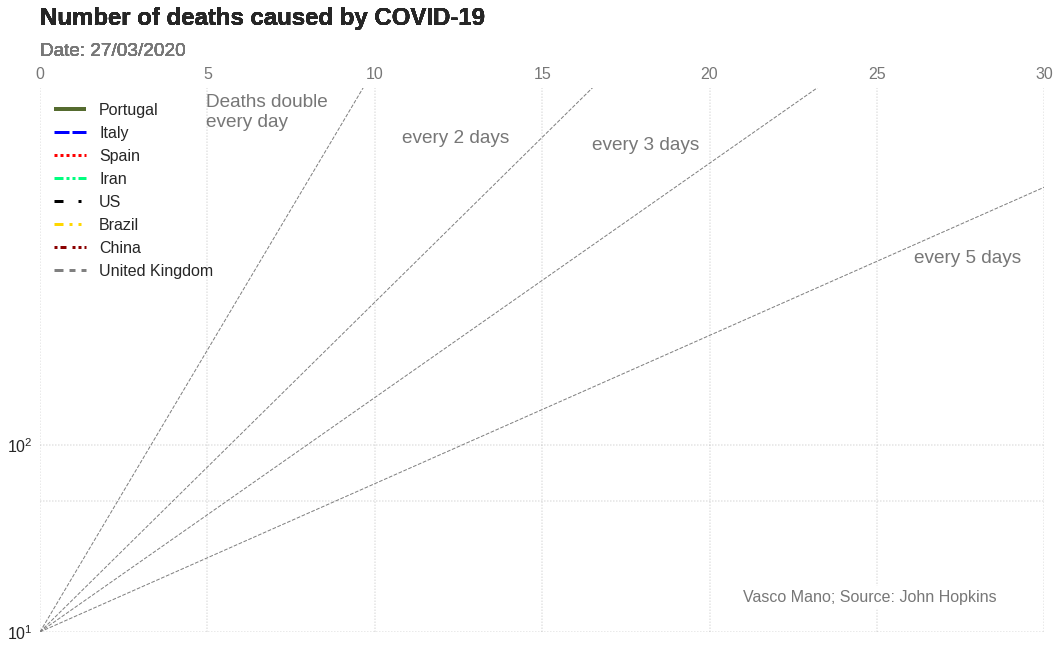

In [0]:
#hide
import matplotlib.animation as animation
from IPython.display import HTML

range_frames = [     1,  2,   3,  4,  5,  6,  7,  8,  9,
                10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                30, 30, 30, 30, 30]

fig, ax = plt.subplots(figsize=(18, 10))
animator = animation.FuncAnimation(fig, frames_deaths, frames=range_frames, interval=400)
animator.save('drive/My Drive/Colab Notebooks/Covid19/Covid19_deaths_26032020.mp4')

In [0]:
#hide_input
import logging
logging.getLogger().setLevel(logging.CRITICAL)

HTML(animator.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#hide
import moviepy.editor as mpe
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

my_video = mpe.VideoFileClip('drive/My Drive/Colab Notebooks/Covid19/Covid19_deaths_26032020.mp4')
my_audio = mpe.AudioFileClip('drive/My Drive/Colab Notebooks/Covid19/Realization.mp3')

final = my_video.set_audio(my_audio)

end_time = 20
final = final.subclip(0, end_time)

final.write_videofile(f'drive/My Drive/Colab Notebooks/Covid19/Covid19_deaths_26032020_video.mp4', audio_codec='libvorbis', rewrite_audio=False)

[MoviePy] >>>> Building video drive/My Drive/Colab Notebooks/Covid19/Covid19_deaths_26032020_video.mp4
[MoviePy] Writing audio in Covid19_deaths_26032020_videoTEMP_MPY_wvf_snd.ogg


100%|██████████| 442/442 [00:01<00:00, 318.69it/s]

[MoviePy] Done.
[MoviePy] Writing video drive/My Drive/Colab Notebooks/Covid19/Covid19_deaths_26032020_video.mp4



 98%|█████████▊| 50/51 [00:00<00:00, 111.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/My Drive/Colab Notebooks/Covid19/Covid19_deaths_26032020_video.mp4 

